In [1]:
import os
import glob
import torch
import cv2
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader

from pipelines import train_model, test_model
from models import UNetResNet
from dataset import CustomDataset
from util import showImage, showImageRow, threshold
from criterion import weighted_loss
import torch.optim as optim


C:\Anaconda\envs\DL\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Anaconda\envs\DL\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
IMAGE_PATH = os.path.join("dataset", "shadow-images/")
LABEL_PATH = os.path.join("dataset", "shadow-labels")
ROWS, COLS = (256, 256)
EXT_JPG = "*.jpg"

In [4]:
image_paths = glob.glob(os.path.join(IMAGE_PATH, EXT_JPG))[:1000]
label_paths = glob.glob(os.path.join(LABEL_PATH, EXT_JPG))[:1000]

x_train_paths, x_test_paths, y_train_paths, y_test_paths = train_test_split(image_paths, label_paths, test_size=0.1)

print("Length of Training Data:", len(x_train_paths))
print("Length of Testing  Data:", len(x_test_paths))

ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [6]:
data_transforms = {
    "image": transforms.Compose([transforms.ToTensor(), transforms.Resize((ROWS, COLS))]),
    "label": transforms.Compose([transforms.ToTensor(), transforms.Resize((ROWS, COLS))]),
}

BATCH_SIZE = 8

task3_datasets = {
    "train": CustomDataset(
        x_train_paths,
        y_train_paths,
        data_transforms["image"],
        data_transforms["label"],
    ),
    "val": CustomDataset(
        x_test_paths,
        y_test_paths,
        data_transforms["image"],
        data_transforms["label"],
    ),
}


dataloaders = {
    phase: DataLoader(task3_datasets[phase], BATCH_SIZE, shuffle=True, num_workers=0)
    for phase in ["train", "val"]
}


NameError: name 'x_train_paths' is not defined

In [8]:
model = UNetResNet(34, 1, pretrained=True, is_deconv=True).to(device=device)
weights = torch.load("kaggle_weights2/best.pt")
model.load_state_dict(weights)

<All keys matched successfully>

In [9]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [10]:
import gc

gc.collect()

torch.cuda.empty_cache()

In [11]:
criterion = weighted_loss
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [38]:
val_loss_history, train_loss_history = train_model(
    model, dataloaders, criterion, optimizer, device, num_epochs=EPOCHS
)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 0 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.7926	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.4953	
Epoch 1 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.4516	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.4319	
Epoch 2 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.3123	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3260	
Epoch 3 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.1975	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.2596	
Epoch 4 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.1380	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3505	
Epoch 5 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0996	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3596	
Epoch 6 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0788	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3155	
Epoch 7 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0676	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3379	
Epoch 8 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0598	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3114	
Epoch 9 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0527	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3433	
Epoch 10 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0474	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3146	
Epoch 11 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0453	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3063	
Epoch 12 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0436	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3208	
Epoch 13 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0405	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3348	
Epoch 14 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0377	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3459	
Epoch 15 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0372	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.2959	
Epoch 16 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0350	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3224	
Epoch 17 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0349	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.2794	
Epoch 18 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0334	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.2579	
Epoch 19 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0318	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3195	
------------------------------
Training Complete
Best Validation Loss: 0.2579


In [12]:
weights = torch.load("kaggle_weights/best.pt")
model.load_state_dict(weights)
model.eval()

test_paths = list(glob.glob("dataset/shadow-images/*.jpg"))[-5:]
label_paths = list(glob.glob("dataset/shadow-labels/*.jpg"))[-5:]

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle_weights/best.pt'

Input Image


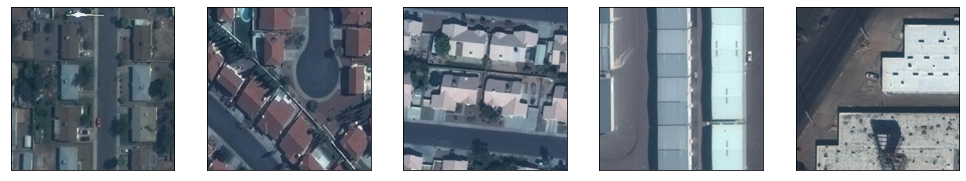

Predicted Segmentations


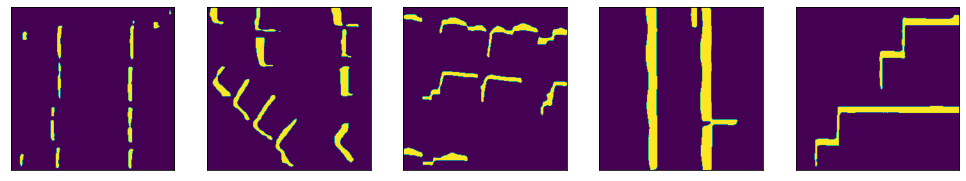

Ground Truth


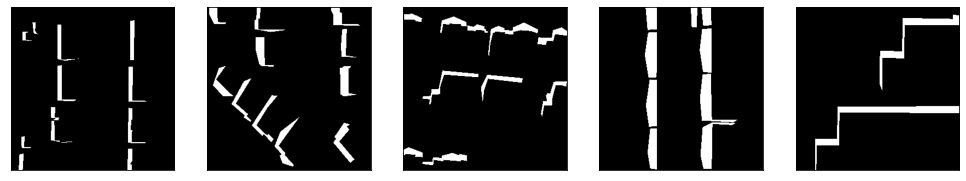

In [44]:
outputs = []
inputs = []
labels = []

for image_path, label_path in zip(test_paths, label_paths):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    inputs.append(cv2.resize(image, (ROWS, COLS)))
    # image = torch.tensor(cv2.resize(image, (ROWS, COLS))).to(device=device)
    image = data_transforms["image"](image).to(device=device)
    image = image.reshape(1, *image.shape)
    label = cv2.cvtColor(cv2.imread(label_path), cv2.COLOR_BGR2RGB)
    labels.append(label)
    output = model(image)[0].permute(1, 2, 0).detach().cpu().numpy()
    
    outputs.append(threshold(output))

print("Input Image")
showImageRow(inputs)
print("Predicted Segmentations")
showImageRow(outputs)
print("Ground Truth")
showImageRow(labels)

In [13]:
import numpy as np

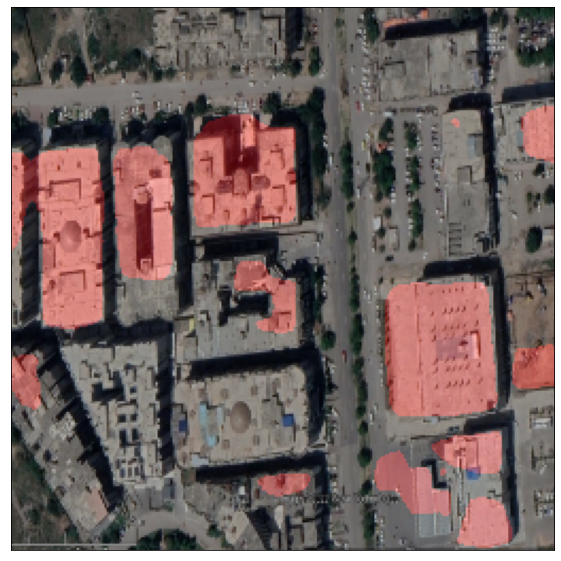

In [54]:
test_path = glob.glob("lums_image/isb3.jpg")
inputs = None
outputs = None
for image_path in test_path:
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    # image = image[300:700, 600:900, :]
    # showImage(image)
    # break
    inputs =cv2.resize(image, (ROWS, COLS))
    # image = torch.tensor(cv2.resize(image, (ROWS, COLS))).to(device=device)
    image = data_transforms["image"](image).to(device=device)
    image = image.reshape(1, *image.shape)
    output = torch.nn.functional.sigmoid(model(image))
    output = output[0].permute(1, 2, 0).detach().cpu().numpy()
    img2 = cv2.merge((output,output,output))
    for i in range(len(img2)):
        for j in range(len(output[i])):
            if img2[i][j][0] > 0.5:
                img2[i][j] = [1, 0, 0]
            else:
                img2[i][j] = [0, 0, 0]
    outputs = img2


# outputs = cv2.cvtColor(outputs, cv2.COLOR_BGR2BGRA)
# inputs - cv2.cvtColor(outputs, cv2.COLOR_BGR2BGRA)

outputs = (outputs * 255).astype(np.uint8)
# print(inputs.dtype)

final = cv2.addWeighted(inputs, 0.7, outputs, 0.3, 1)
showImage(final)

# print(outputs.shape)

# print("Input Image")
# showImage(inputs)
# print("Predicted Segmentations")
# showImage(outputs)